## Keypoint Detection
---
There are 10 images given in the ***img*** folder. Your task is to detect ***200*** keypoints for each of them using detectors.

Below are the tutorials about SIFT and Harris corners:

SIFT: https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

Harris corners: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html#harris-corners

Let's take a look at these images first!

---

In [1]:
# load packages
import cv2
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

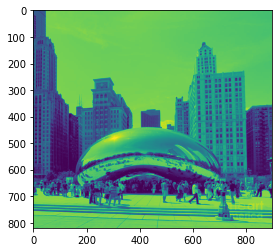

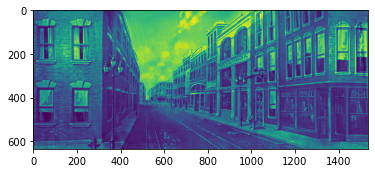

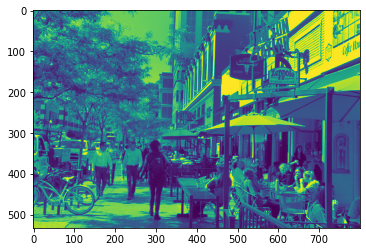

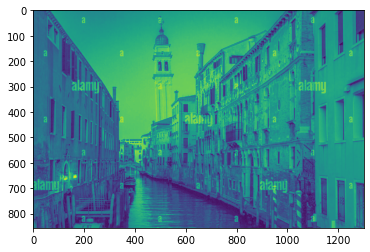

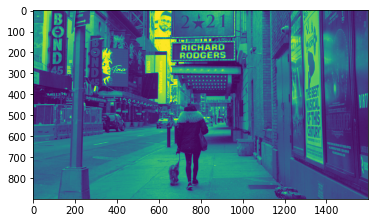

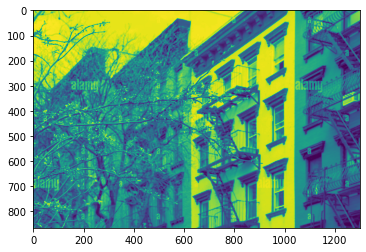

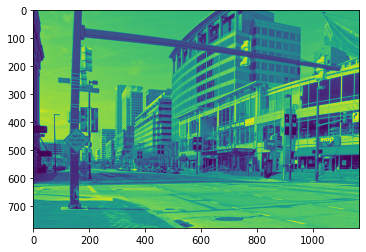

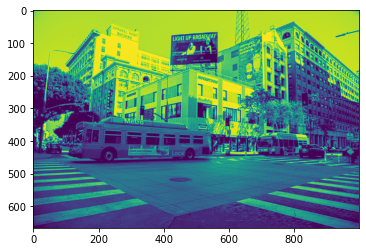

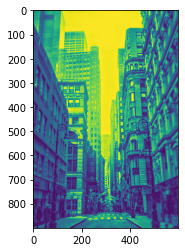

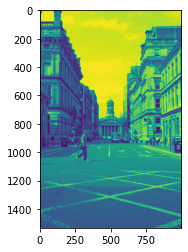

In [2]:
img_dir = "images"
if os.path.exists(img_dir):
    if os.listdir(img_dir) is []:
        print("No images!")
        exit(0)
    num_img = len(os.listdir(img_dir))
    for img in os.listdir(img_dir):
        if not img.endswith("jpg"):
            continue
        image_dir = os.path.join(img_dir, img)
        image = cv2.imread(image_dir)
        gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        plt.imshow(gray)
        plt.show()
else:
    print("image folder not exists!")
    exit(0)

In [3]:
def getPatches(kps, img, size=32, num=200):
    res = torch.zeros(num, 1, size, size)
    if type(img) is np.ndarray:
        img = torch.from_numpy(img)
    h, w = img.shape      # note: for image, the x direction is the verticle, y-direction is the horizontal...
    for i in range(num):
        cx, cy = kps[i]
        cx, cy = int(cx), int(cy)
        dd = int(size/2)
        xmin, xmax = max(0, cx - dd), min(w, cx + dd ) 
        ymin, ymax = max(0, cy - dd), min(h, cy + dd ) 
        
        xmin_res, xmax_res = dd - min(dd,cx), dd + min(dd, w - cx)
        ymin_res, ymax_res = dd - min(dd,cy), dd + min(dd, h - cy)

        cropped_img = img[ymin: ymax, xmin: xmax]
        ch, cw = cropped_img.shape
        res[i, 0, ymin_res: ymin_res+ch, xmin_res: xmin_res+cw] =  cropped_img
        
    return res

### Let's plot these patches

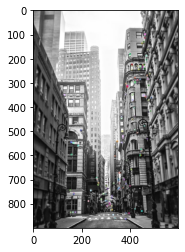

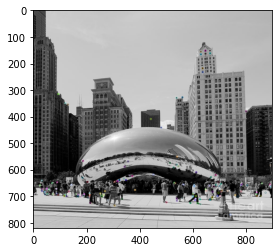

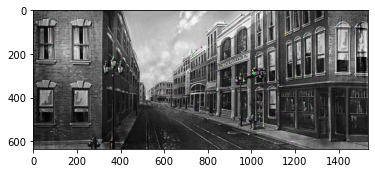

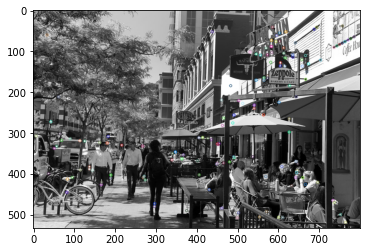

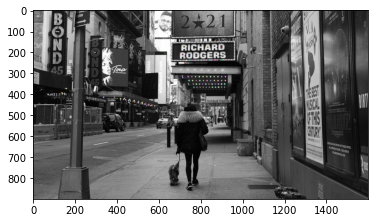

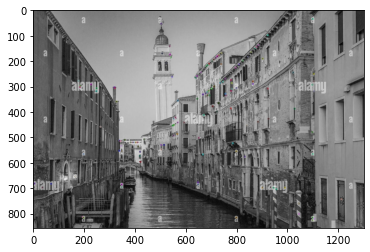

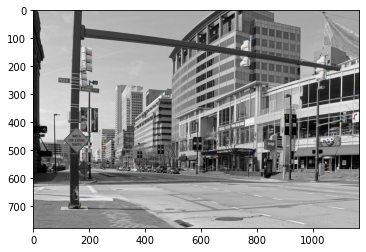

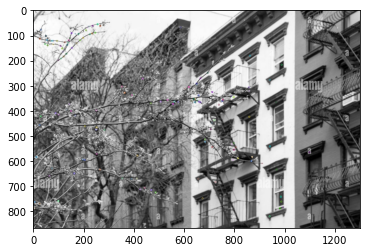

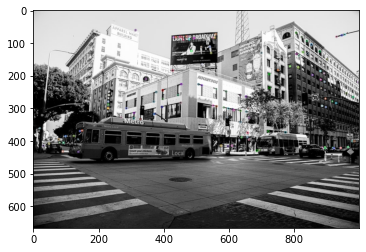

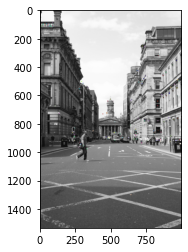

In [4]:
all_patches = []
sift = cv2.xfeatures2d.SIFT_create(nfeatures=200)

for i in range (1,11):
    img = cv2.imread('images/{}.jpg'.format(i))
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    keypoints, descriptors_1 = sift.detectAndCompute(gray, None)
    img=cv2.drawKeypoints(gray, keypoints, None)
    keypoints = cv2.KeyPoint_convert(keypoints)[:200]
    plt.imshow(img)
    plt.show()
    patches = getPatches(keypoints, gray,size=32, num=200)
    all_patches.append(torch.as_tensor(patches))

all_patches = torch.cat(all_patches, dim=1)

In [5]:
all_patches = all_patches.view(10, 200, 1, 32, 32)
print(all_patches.shape)

torch.Size([10, 200, 1, 32, 32])


In [6]:
output_dir = "SIFT.pth"
torch.save(all_patches, output_dir)

### Test with your saved patches

In [7]:
test_patches = torch.load(output_dir)
print(type(test_patches))
print(all_patches.shape)

<class 'torch.Tensor'>
torch.Size([10, 200, 1, 32, 32])


# Harris corner

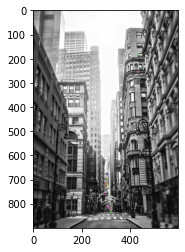

200


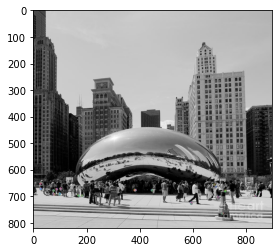

200


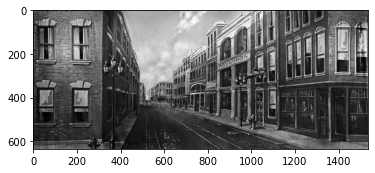

200


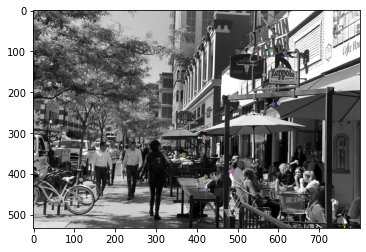

200


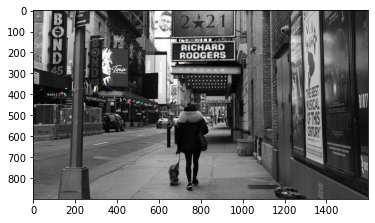

200


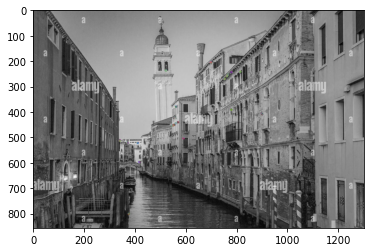

200


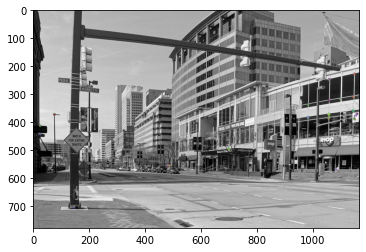

200


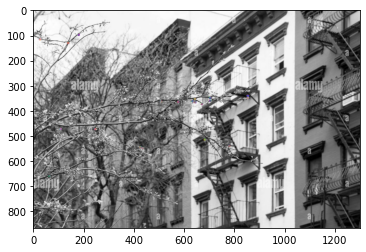

200


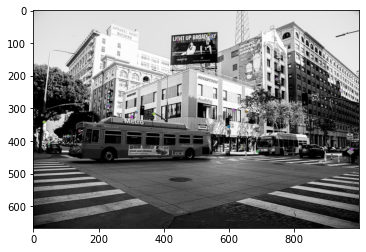

200


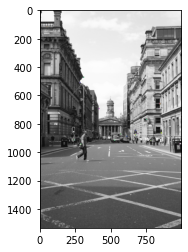

200


In [8]:
all_patches = []
for i in range (1,11):
    keypoints = []
    img = cv2.imread('images/{}.jpg'.format(i))
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst,None)
    thresh = np.sort(dst.flatten())[-200]
    display_image = np.copy(gray)

    kp_found = 0
    for j in range(0, dst.shape[0]):
        for i in range(0, dst.shape[1]):            
            if(dst[j,i] >= thresh) and kp_found<200:
                keypoints.append(cv2.KeyPoint(i, j, 1))
                kp_found += 1
    img = cv2.drawKeypoints(gray, keypoints, None)
    plt.imshow(img)
    plt.show()
    print(len(keypoints))

    keypoints = cv2.KeyPoint_convert(keypoints) 
    patches = getPatches(keypoints, gray,size=32, num=200)
    all_patches.append(torch.as_tensor(patches))

all_patches = torch.cat(all_patches, dim=1)




In [9]:
all_patches = all_patches.view(10, 200, 1, 32, 32)
print(all_patches.shape)

output_dir = "Harris.pth"         
torch.save(all_patches, output_dir)

test_patches = torch.load(output_dir)
print(type(test_patches))
print(all_patches.shape)


torch.Size([10, 200, 1, 32, 32])
<class 'torch.Tensor'>
torch.Size([10, 200, 1, 32, 32])
